In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math 

In [3]:
path = '/Users/ilyalobanov/CMF MFT/Final/Data/lobs.csv'

data = pd.read_csv(path)

data

,receive_ts,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,ask_price_2,...,bid_vol_2,ask_price_3,ask_vol_3,bid_price_3,bid_vol_3,ask_price_4,ask_vol_4,bid_price_4,bid_vol_4,exchange_ts
0,2022-12-01 00:00:00,44.249,30.5,44.190,5.9,44.251,10.0,44.188,30.5,44.261,...,60.3,44.265,63.2,44.173,30.5,44.271,155.0,44.172,43.2,2022-12-01 00:00:00
1,2022-12-01 00:00:01,44.249,30.5,44.190,5.9,44.265,63.2,44.188,30.5,44.271,...,60.3,44.277,15.0,44.173,30.5,44.285,32.4,44.172,43.2,2022-12-01 00:00:01
2,2022-12-01 00:00:02,44.249,30.5,44.186,60.3,44.265,63.2,44.173,30.5,44.271,...,64.6,44.285,32.4,44.126,155.0,44.287,32.6,44.123,193.9,2022-12-01 00:00:02
3,2022-12-01 00:00:03,44.224,30.5,44.188,30.5,44.256,10.0,44.187,5.9,44.257,...,353.3,44.265,225.2,44.166,60.3,44.268,39.7,44.154,64.6,2022-12-01 00:00:03
4,2022-12-01 00:00:04,44.253,46.8,44.219,366.4,44.254,30.5,44.188,30.5,44.255,...,5.9,44.256,70.3,44.184,353.3,44.257,90.0,44.166,60.3,2022-12-01 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,2022-12-16 01:06:35,30.822,60.0,30.777,60.0,30.823,90.5,30.766,90.5,30.830,...,161.9,30.849,41.4,30.727,288.7,30.850,148.0,30.725,2041.0,2022-12-16 01:06:35
1299996,2022-12-16 01:06:36,30.822,60.0,30.777,60.0,30.823,90.5,30.766,90.5,30.825,...,65.9,30.830,260.0,30.752,260.0,30.841,47.6,30.731,42.9,2022-12-16 01:06:36
1299997,2022-12-16 01:06:37,30.841,60.0,30.783,18.5,30.849,41.4,30.782,60.0,30.850,...,90.5,30.852,161.9,30.777,60.0,30.854,260.0,30.773,260.0,2022-12-16 01:06:37
1299998,2022-12-16 01:06:38,30.841,60.0,30.793,260.0,30.850,148.0,30.789,65.9,30.852,...,60.0,30.854,260.0,30.787,188.7,30.873,406.0,30.786,90.0,2022-12-16 01:06:38


In [5]:
data.index = data.receive_ts
data = data.drop(columns = ['receive_ts', 'exchange_ts'])
data.head()

,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,ask_price_2,ask_vol_2,bid_price_2,bid_vol_2,ask_price_3,ask_vol_3,bid_price_3,bid_vol_3,ask_price_4,ask_vol_4,bid_price_4,bid_vol_4
receive_ts,,,,,,,,,,,,,,,,,,,,
2022-12-01 00:00:00,44.249,30.5,44.190,5.9,44.251,10.0,44.188,30.5,44.261,30.5,44.186,60.3,44.265,63.2,44.173,30.5,44.271,155.0,44.172,43.2
2022-12-01 00:00:01,44.249,30.5,44.190,5.9,44.265,63.2,44.188,30.5,44.271,155.0,44.186,60.3,44.277,15.0,44.173,30.5,44.285,32.4,44.172,43.2
2022-12-01 00:00:02,44.249,30.5,44.186,60.3,44.265,63.2,44.173,30.5,44.271,155.0,44.154,64.6,44.285,32.4,44.126,155.0,44.287,32.6,44.123,193.9
2022-12-01 00:00:03,44.224,30.5,44.188,30.5,44.256,10.0,44.187,5.9,44.257,90.0,44.184,353.3,44.265,225.2,44.166,60.3,44.268,39.7,44.154,64.6
2022-12-01 00:00:04,44.253,46.8,44.219,366.4,44.254,30.5,44.188,30.5,44.255,5.9,44.187,5.9,44.256,70.3,44.184,353.3,44.257,90.0,44.166,60.3


In [6]:
data['miprice'] = (data['ask_price_0'] + data['bid_price_0']) / 2

In [7]:
data.head()

,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,ask_price_2,ask_vol_2,...,bid_vol_2,ask_price_3,ask_vol_3,bid_price_3,bid_vol_3,ask_price_4,ask_vol_4,bid_price_4,bid_vol_4,miprice
receive_ts,,,,,,,,,,,,,,,,,,,,,
2022-12-01 00:00:00,44.249,30.5,44.190,5.9,44.251,10.0,44.188,30.5,44.261,30.5,...,60.3,44.265,63.2,44.173,30.5,44.271,155.0,44.172,43.2,44.2195
2022-12-01 00:00:01,44.249,30.5,44.190,5.9,44.265,63.2,44.188,30.5,44.271,155.0,...,60.3,44.277,15.0,44.173,30.5,44.285,32.4,44.172,43.2,44.2195
2022-12-01 00:00:02,44.249,30.5,44.186,60.3,44.265,63.2,44.173,30.5,44.271,155.0,...,64.6,44.285,32.4,44.126,155.0,44.287,32.6,44.123,193.9,44.2175
2022-12-01 00:00:03,44.224,30.5,44.188,30.5,44.256,10.0,44.187,5.9,44.257,90.0,...,353.3,44.265,225.2,44.166,60.3,44.268,39.7,44.154,64.6,44.2060
2022-12-01 00:00:04,44.253,46.8,44.219,366.4,44.254,30.5,44.188,30.5,44.255,5.9,...,5.9,44.256,70.3,44.184,353.3,44.257,90.0,44.166,60.3,44.2360


In [9]:
class Dataloader():
    def __init__(
        self, 
        dataframe: pd.DataFrame, 
        window_size: int, 
        step_size: int,
        horizon: int,
        first_pred: int
    ):
        self.df = dataframe
        self.window_size = window_size
        self.step_size = step_size
        self.horizon = horizon
        self.first_pred = first_pred
        assert self.first_pred > self.window_size
        feat_idx = []
        target_idx = []
        for i in range(self.first_pred, self.df.shape[0], self.step_size):
            feat_idx.append(range(i-self.horizon-self.window_size+1, i-self.horizon+1))
            target_idx.append(i)
        self.feat_idx = feat_idx
        self.target_idx = target_idx
    
    def __len__(self):
        return len(self.feat_idx)
    
    def __iter__(self):
        self.iter = 0
        return self

    def __next__(self):
        if self.iter < len(self.feat_idx):
            feat = self.df.iloc[self.feat_idx[self.iter]]
            target = self.df.iloc[self.target_idx[self.iter], -1]
            self.iter += 1
            return feat, target
        else:
            raise StopIteration

In [10]:
window_size = 1 

In [11]:
SLICE = 100000

In [84]:
loader = Dataloader(
    dataframe=data, 
    window_size=window_size, 
    step_size=1, 
    horizon=60, 
    first_pred=1060)

for feat, target in loader:
    break
feat.shape, target

((1, 21), 44.0775)

In [85]:
features = []
targets = []

for feat, target in loader: 
    features.append(feat.values.reshape(-1))
    targets.append(target)


In [67]:
features

array([[  44.165 ,   36.4   ,   44.122 , ...,   44.104 ,   44.4   ,
          44.1435],
       [  44.165 ,   36.4   ,   44.122 , ...,   44.098 , 1988.    ,
          44.1435],
       [  44.165 ,   36.4   ,   44.122 , ...,   44.098 , 1988.    ,
          44.1435],
       ...,
       [  46.925 ,   29.    ,   46.883 , ...,   46.852 ,   86.6   ,
          46.904 ],
       [  46.925 ,   29.    ,   46.883 , ...,   46.852 ,   86.6   ,
          46.904 ],
       [  46.925 ,   55.    ,   46.883 , ...,   46.852 ,   86.6   ,
          46.904 ]])

In [30]:
len(data.columns)

21

In [31]:
features = np.array(features)
features.shape

(98940, 21)

In [86]:
df = pd.DataFrame(features, columns = data.columns)
df.head()


,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,ask_price_2,ask_vol_2,...,bid_vol_2,ask_price_3,ask_vol_3,bid_price_3,bid_vol_3,ask_price_4,ask_vol_4,bid_price_4,bid_vol_4,miprice
0,44.165,36.4,44.122,30.5,44.171,63.9,44.120,71.3,44.172,39.6,...,1988.0,44.173,28.1,44.105,60.3,44.175,327.9,44.104,44.4,44.1435
1,44.165,36.4,44.122,30.5,44.171,63.9,44.120,71.3,44.172,39.6,...,60.3,44.173,28.1,44.104,44.4,44.175,327.9,44.098,1988.0,44.1435
2,44.165,36.4,44.122,30.5,44.171,63.9,44.120,71.3,44.172,39.6,...,60.3,44.173,28.1,44.104,44.4,44.175,327.9,44.098,1988.0,44.1435
3,44.162,30.5,44.122,36.4,44.163,5.9,44.120,65.4,44.164,45.6,...,60.3,44.165,30.5,44.098,1988.0,44.171,63.9,44.082,1129.0,44.1420
4,44.153,30.5,44.090,5.3,44.155,45.6,44.089,30.5,44.156,30.5,...,60.5,44.161,28.1,44.087,1989.0,44.162,28.1,44.085,44.4,44.1215


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.2, random_state=42, shuffle = False)

In [69]:
df.tail()

,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,ask_price_2,ask_vol_2,...,bid_vol_2,ask_price_3,ask_vol_3,bid_price_3,bid_vol_3,ask_price_4,ask_vol_4,bid_price_4,bid_vol_4,miprice
98935,46.925,29.0,46.885,29.0,46.93,127.8,46.883,63.0,46.933,26.0,...,51.7,46.937,1871.0,46.868,27.3,46.939,34.9,46.864,60.3,46.905
98936,46.925,29.0,46.885,29.0,46.93,127.8,46.883,63.0,46.933,26.0,...,51.7,46.936,642.2,46.868,27.3,46.937,1871.0,46.864,60.3,46.905
98937,46.925,29.0,46.883,63.0,46.93,127.8,46.878,51.7,46.933,26.0,...,27.3,46.936,642.2,46.864,60.3,46.937,1871.0,46.852,86.6,46.904
98938,46.925,29.0,46.883,63.0,46.93,101.8,46.878,51.7,46.933,26.0,...,27.3,46.936,642.2,46.864,60.3,46.937,1871.0,46.852,86.6,46.904
98939,46.925,55.0,46.883,63.0,46.93,101.8,46.878,51.7,46.933,26.0,...,27.3,46.936,642.2,46.864,102.4,46.937,1871.0,46.852,86.6,46.904


In [88]:
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge

model = Ridge()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [89]:
y_pred = model.predict(X_test)
y_pred

array([37.52000607, 37.52490167, 37.52419109, ..., 30.75660995,
       30.76797368, 30.76495226])

In [90]:
y_train_pred = model.predict(X_train)
y_train_pred

array([44.14078763, 44.13870581, 44.13870581, ..., 37.51272219,
       37.50416632, 37.50416632])

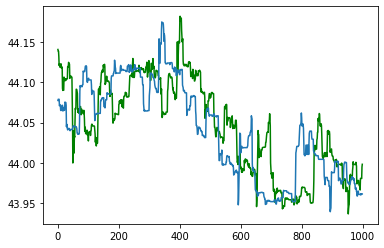

In [91]:
plt.plot(y_train_pred[:1000], label = 'Prediction', color = 'green')
plt.plot(y_train[:1000], label = 'Target')
plt.show()

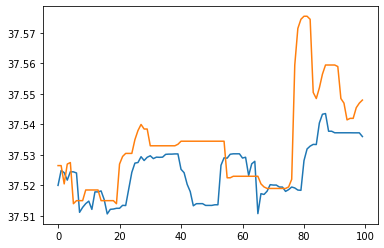

In [92]:
plt.plot(y_pred[:100], label = 'Prediction')
plt.plot(y_test[:100], label = 'Target')
plt.show()

In [93]:
pred = model.predict(features)
print(len(pred))

/Users/ilyalobanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


1298940


In [ ]:
np.save('predictions', pred)